# Chapter 8: Dimensionality Reduction - Exercises

## Notes Randomized PCA

In randomized PCA, rank-K randomized SVD is used.

Let

$$ A \in \mathbb{R}^{m\times n} $$

be a matrix of $m$ observations for $n$ features. If $m$ or $n$ are large, PCA becomes intractable.

It turns out that high dimensionality can be tackled using a small, tractable matrix as surrogate for $A$. Let $Q$ be an ortonormal matrix with k columns and n rows. If k << n,m, then for $Q^T A$ the SVD is tractable. Let $Q^T A = U S V^T$ be the SVD. 

Since $Q$ is orthonormal,

$$ A = IA = QQ^T A = QU S V^T = U_A S V^T$$

which is the SVD of $A$. 

It turns out that a suitable $Q$ can be generated by projecting A onto a random matrix (i.e. columns are drawn from an appropriate guassian) and decomposing the resulting matrix using QR decomposition:

* Draw random i.i.d gaussian matrix $O \in \mathbb{R}^{n\times k}$
* Form $Y = AO$
* Calculate $QR = Y$ via QR decomposition

# Problem 1

What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

* Reduce training data size to speed up training
* (Possibly) remove noise features 

# Problem 2

What is the curse of dimensionality?

In higher dimensions, the data is sparse, i.e. all data points are far from one another along some dimension.

# Problem 3

Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

# Problem 4

Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

# Problem 5

Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

# Problem 6

In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA,
or Kernel PCA?

# Problem 7

How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

# Problem 8

Does it make any sense to chain two different dimensionality reduction algorithms?

# Problem 9

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [68]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from umap import UMAP

In [69]:
mnist = fetch_openml('mnist_784', version=1)

In [70]:
X = mnist["data"] / 255.0
y = mnist["target"].astype(np.uint8)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [72]:
clf = RandomForestClassifier(n_jobs=-1)

In [73]:
time_full = %timeit -o clf.fit(X_train, y_train)

5.5 s ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
y_pred_test = clf.predict(X_test)
print('F1 (Macro Average): {:6.5f}'.format(f1_score(y_test, y_pred_test, average='macro')))
print('F1 (Micro Average): {:6.5f}'.format(f1_score(y_test, y_pred_test, average='micro')))

F1 (Macro Average): 0.96843
F1 (Micro Average): 0.96860


In [77]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [78]:
X_train_reduced.shape

(60000, 154)

In [79]:
time_pca = %timeit -o clf.fit(X_train_reduced, y_train)

12.5 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
y_pred_test = clf.predict(X_test_reduced)
print('F1 (Macro Average): {:6.5f}'.format(f1_score(y_test, y_pred_test, average='macro')))
print('F1 (Micro Average): {:6.5f}'.format(f1_score(y_test, y_pred_test, average='micro')))

F1 (Macro Average): 0.94375
F1 (Micro Average): 0.94420


In [92]:
print('Increase in time for PCA: {:.3}'.format(time_pca.average / time_full.average))

Increase in time for PCA: 2.28


For this data set and classifier, the training time is longer (by a factor of 2.3). Accuracy, as measured by the Average F1 Score decreases from around 0.97 to 0.945 (for both macro and micro averages).

# Problem 10

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

from umap import UMAP

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist["data"] / 255.0
y = mnist["target"].astype(np.uint8)

In [4]:
np.random.seed(42)

m = 2000
idx = np.random.permutation(60000)[:m]

X = X[idx]
y = y[idx]

In [5]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_reduced_tsne = tsne.fit_transform(X)

No handles with labels found to put in legend.


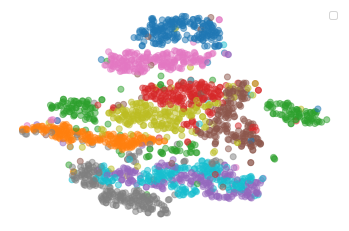

In [6]:
plt.scatter(X_reduced_tsne[:10000, 0], X_reduced_tsne[:10000, 1], 
            c=y[:10000], cmap='tab10', alpha=0.5)
plt.axis('off')
plt.legend()
plt.show()

### LLE

In [7]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42, n_jobs=-1)
X_reduced_lle = lle.fit_transform(X)

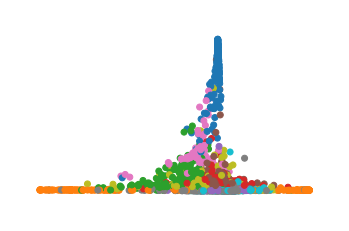

In [8]:
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=y, cmap='tab10')
plt.axis('off')
plt.show()

### MDS

In [9]:
mds = MDS(n_components=2, random_state=42, n_jobs=-1)
X_reduced_mds = mds.fit_transform(X)

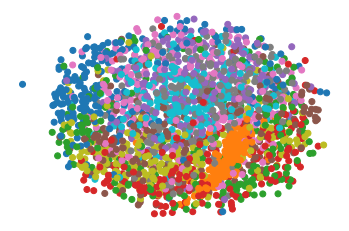

In [10]:
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=y, cmap='tab10')
plt.axis('off')
plt.show()

### UMAP

In [11]:
umap = UMAP(n_components=2, random_state=42)
X_reduced_umap = umap.fit_transform(X)

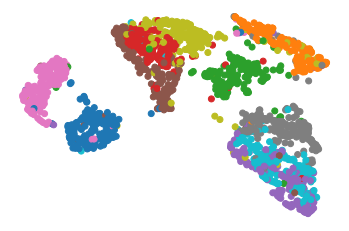

In [12]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=y, cmap='tab10')
plt.axis('off')
plt.show()